<a href="https://colab.research.google.com/github/luciainnocenti/IncrementalLearning/blob/LinearSVM-Ele/ICaRLMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import GitHub repository

In [ ]:
import os
import logging
import sys

In [ ]:
if not os.path.isdir('./DatasetCIFAR'):
  !git clone -b LinearSVM-Ele https://github.com/luciainnocenti/IncrementalLearning.git
  !mv 'IncrementalLearning' 'DatasetCIFAR'

Cloning into 'IncrementalLearning'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 1718 (delta 84), reused 0 (delta 0), pack-reused 1574
Receiving objects: 100% (1718/1718), 2.20 MiB | 2.38 MiB/s, done.
Resolving deltas: 100% (1092/1092), done.


# Import packages

In [ ]:
from DatasetCIFAR.data_set import Dataset 
from DatasetCIFAR.data_set import Subset
from DatasetCIFAR import ResNet
from DatasetCIFAR import utils
from DatasetCIFAR import params
from DatasetCIFAR import ICaRLModel
from torchvision import models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from torchvision import transforms
from torch.utils.data import DataLoader
from torch.nn import functional as F
import random
random.seed(params.SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(params.SEED)
print(params.NUM_WORKERS)

653
4


# Define Datasets

In [ ]:
train_transformer = transforms.Compose([transforms.RandomCrop(size = 32, padding=4),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transformer = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
trainDS = Dataset(train=True)
testDS = Dataset(train=False)

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [ ]:
train_splits = trainDS.splits
test_splits = testDS.splits

# Define Network

In [ ]:
ICaRL = ResNet.resnet32(num_classes=100)
ICaRL =  ICaRL.to(params.DEVICE)

In [ ]:
exemplars = [None]*100

test_indexes =  []
accs = []

At step  0  and at epoch =  0  the loss is =  0.029777517542243004  and accuracy is =  0.2144
At step  0  and at epoch =  1  the loss is =  0.025983760133385658  and accuracy is =  0.3852
At step  0  and at epoch =  2  the loss is =  0.019630003720521927  and accuracy is =  0.4582
At step  0  and at epoch =  3  the loss is =  0.024498725309967995  and accuracy is =  0.5288
At step  0  and at epoch =  4  the loss is =  0.020160870626568794  and accuracy is =  0.5476
At step  0  and at epoch =  5  the loss is =  0.03659680858254433  and accuracy is =  0.612
At step  0  and at epoch =  6  the loss is =  0.02089894935488701  and accuracy is =  0.586
At step  0  and at epoch =  7  the loss is =  0.016954362392425537  and accuracy is =  0.66
At step  0  and at epoch =  8  the loss is =  0.02497043088078499  and accuracy is =  0.668
At step  0  and at epoch =  9  the loss is =  0.01347848866134882  and accuracy is =  0.707
At step  0  and at epoch =  10  the loss is =  0.016351349651813507  a

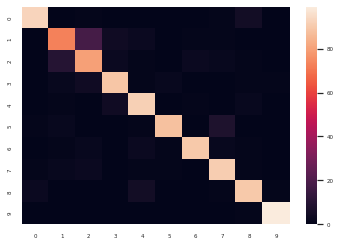

At step  10  and at epoch =  0  the loss is =  0.031606610864400864  and accuracy is =  0.293
At step  10  and at epoch =  1  the loss is =  0.027576420456171036  and accuracy is =  0.3782857142857143
At step  10  and at epoch =  2  the loss is =  0.02466893009841442  and accuracy is =  0.4767142857142857
At step  10  and at epoch =  3  the loss is =  0.024936120957136154  and accuracy is =  0.5408571428571428
At step  10  and at epoch =  4  the loss is =  0.022189706563949585  and accuracy is =  0.5714285714285714
At step  10  and at epoch =  5  the loss is =  0.023990655317902565  and accuracy is =  0.6012857142857143
At step  10  and at epoch =  6  the loss is =  0.02155660279095173  and accuracy is =  0.6114285714285714
At step  10  and at epoch =  7  the loss is =  0.021565573289990425  and accuracy is =  0.643
At step  10  and at epoch =  8  the loss is =  0.023533713072538376  and accuracy is =  0.6514285714285715
At step  10  and at epoch =  9  the loss is =  0.0185615606606006

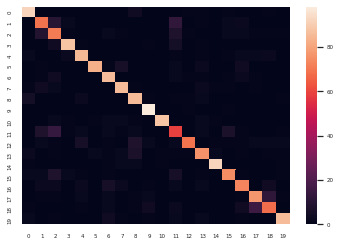

At step  20  and at epoch =  0  the loss is =  0.037509746849536896  and accuracy is =  0.28085714285714286
At step  20  and at epoch =  1  the loss is =  0.03271573409438133  and accuracy is =  0.3465714285714286
At step  20  and at epoch =  2  the loss is =  0.0333089604973793  and accuracy is =  0.44485714285714284
At step  20  and at epoch =  3  the loss is =  0.04296373575925827  and accuracy is =  0.5054285714285714
At step  20  and at epoch =  4  the loss is =  0.03297362104058266  and accuracy is =  0.5444285714285715
At step  20  and at epoch =  5  the loss is =  0.030322592705488205  and accuracy is =  0.5702857142857143
At step  20  and at epoch =  6  the loss is =  0.028407730162143707  and accuracy is =  0.6061428571428571
At step  20  and at epoch =  7  the loss is =  0.03255954757332802  and accuracy is =  0.6215714285714286
At step  20  and at epoch =  8  the loss is =  0.02985752746462822  and accuracy is =  0.6431428571428571
At step  20  and at epoch =  9  the loss i

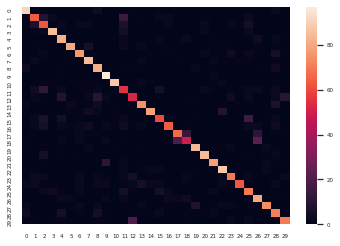

At step  30  and at epoch =  0  the loss is =  0.044557180255651474  and accuracy is =  0.2738944365192582
At step  30  and at epoch =  1  the loss is =  0.04326305165886879  and accuracy is =  0.3700427960057061
At step  30  and at epoch =  2  the loss is =  0.043464500457048416  and accuracy is =  0.43509272467902993
At step  30  and at epoch =  3  the loss is =  0.04200762137770653  and accuracy is =  0.47803138373751786
At step  30  and at epoch =  4  the loss is =  0.037551816552877426  and accuracy is =  0.5098430813124109
At step  30  and at epoch =  5  the loss is =  0.042457737028598785  and accuracy is =  0.553922967189729
At step  30  and at epoch =  6  the loss is =  0.037911564111709595  and accuracy is =  0.5738944365192582
At step  30  and at epoch =  7  the loss is =  0.04266543686389923  and accuracy is =  0.5907275320970042
At step  30  and at epoch =  8  the loss is =  0.037991128861904144  and accuracy is =  0.6094151212553495
At step  30  and at epoch =  9  the los

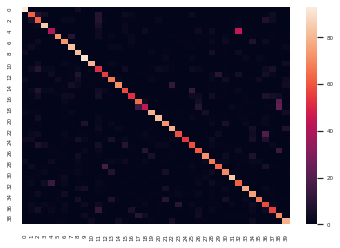

At step  40  and at epoch =  0  the loss is =  0.06022899970412254  and accuracy is =  0.26685714285714285
At step  40  and at epoch =  1  the loss is =  0.055184658616781235  and accuracy is =  0.3384285714285714
At step  40  and at epoch =  2  the loss is =  0.05522488057613373  and accuracy is =  0.38357142857142856
At step  40  and at epoch =  3  the loss is =  0.050463706254959106  and accuracy is =  0.431
At step  40  and at epoch =  4  the loss is =  0.051761068403720856  and accuracy is =  0.4627142857142857
At step  40  and at epoch =  5  the loss is =  0.0548534132540226  and accuracy is =  0.495
At step  40  and at epoch =  6  the loss is =  0.05004323646426201  and accuracy is =  0.5098571428571429
At step  40  and at epoch =  7  the loss is =  0.049867745488882065  and accuracy is =  0.5332857142857143
At step  40  and at epoch =  8  the loss is =  0.05045142024755478  and accuracy is =  0.547
At step  40  and at epoch =  9  the loss is =  0.05065671727061272  and accuracy

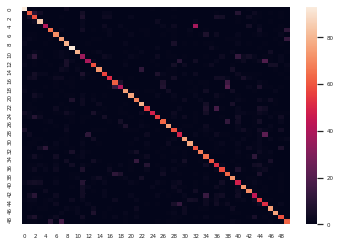

At step  50  and at epoch =  0  the loss is =  0.06232369318604469  and accuracy is =  0.261
At step  50  and at epoch =  1  the loss is =  0.05951657518744469  and accuracy is =  0.32571428571428573
At step  50  and at epoch =  2  the loss is =  0.06063231825828552  and accuracy is =  0.403
At step  50  and at epoch =  3  the loss is =  0.05583743005990982  and accuracy is =  0.4502857142857143
At step  50  and at epoch =  4  the loss is =  0.06478769332170486  and accuracy is =  0.4725714285714286
At step  50  and at epoch =  5  the loss is =  0.061827629804611206  and accuracy is =  0.5007142857142857
At step  50  and at epoch =  6  the loss is =  0.05987345054745674  and accuracy is =  0.5298571428571428
At step  50  and at epoch =  7  the loss is =  0.062478333711624146  and accuracy is =  0.546
At step  50  and at epoch =  8  the loss is =  0.060314372181892395  and accuracy is =  0.5634285714285714
At step  50  and at epoch =  9  the loss is =  0.06175338104367256  and accuracy 

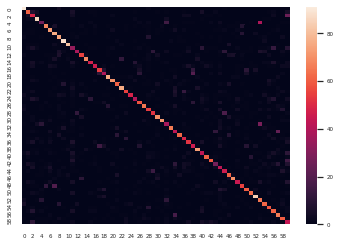

At step  60  and at epoch =  0  the loss is =  0.06689195334911346  and accuracy is =  0.2487106017191977
At step  60  and at epoch =  1  the loss is =  0.06780681014060974  and accuracy is =  0.3223495702005731
At step  60  and at epoch =  2  the loss is =  0.06987850368022919  and accuracy is =  0.37177650429799425
At step  60  and at epoch =  3  the loss is =  0.07107482850551605  and accuracy is =  0.4012893982808023
At step  60  and at epoch =  4  the loss is =  0.07402251660823822  and accuracy is =  0.43810888252149
At step  60  and at epoch =  5  the loss is =  0.07326319813728333  and accuracy is =  0.46977077363896846
At step  60  and at epoch =  6  the loss is =  0.07307302951812744  and accuracy is =  0.4865329512893983
At step  60  and at epoch =  7  the loss is =  0.07002076506614685  and accuracy is =  0.5
At step  60  and at epoch =  8  the loss is =  0.06925351917743683  and accuracy is =  0.5163323782234956
At step  60  and at epoch =  9  the loss is =  0.067168712615

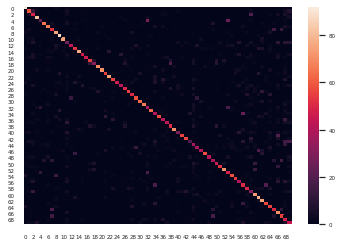

At step  70  and at epoch =  0  the loss is =  0.07982976734638214  and accuracy is =  0.27752489331436697
At step  70  and at epoch =  1  the loss is =  0.0813194140791893  and accuracy is =  0.389900426742532
At step  70  and at epoch =  2  the loss is =  0.08038036525249481  and accuracy is =  0.44935988620199147
At step  70  and at epoch =  3  the loss is =  0.08126425743103027  and accuracy is =  0.4938833570412518
At step  70  and at epoch =  4  the loss is =  0.08215787261724472  and accuracy is =  0.542674253200569
At step  70  and at epoch =  5  the loss is =  0.0818273276090622  and accuracy is =  0.5564722617354196
At step  70  and at epoch =  6  the loss is =  0.08247662335634232  and accuracy is =  0.572972972972973
At step  70  and at epoch =  7  the loss is =  0.08299863338470459  and accuracy is =  0.5981507823613087
At step  70  and at epoch =  8  the loss is =  0.077061727643013  and accuracy is =  0.6092460881934566
At step  70  and at epoch =  9  the loss is =  0.08

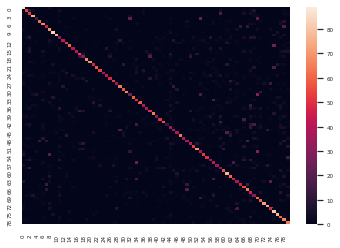

At step  80  and at epoch =  0  the loss is =  0.09623076021671295  and accuracy is =  0.25671428571428573
At step  80  and at epoch =  1  the loss is =  0.09782788157463074  and accuracy is =  0.33985714285714286
At step  80  and at epoch =  2  the loss is =  0.09043783694505692  and accuracy is =  0.40414285714285714
At step  80  and at epoch =  3  the loss is =  0.09906895458698273  and accuracy is =  0.43028571428571427
At step  80  and at epoch =  4  the loss is =  0.08597283065319061  and accuracy is =  0.4675714285714286
At step  80  and at epoch =  5  the loss is =  0.08928641676902771  and accuracy is =  0.49214285714285716
At step  80  and at epoch =  6  the loss is =  0.09561583399772644  and accuracy is =  0.5138571428571429
At step  80  and at epoch =  7  the loss is =  0.0882771909236908  and accuracy is =  0.539
At step  80  and at epoch =  8  the loss is =  0.09028469026088715  and accuracy is =  0.5481428571428572
At step  80  and at epoch =  9  the loss is =  0.094003

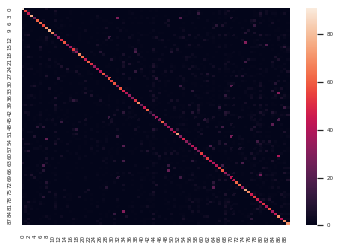

At step  90  and at epoch =  0  the loss is =  0.10774268954992294  and accuracy is =  0.2570200573065903
At step  90  and at epoch =  1  the loss is =  0.09999920427799225  and accuracy is =  0.39040114613180515
At step  90  and at epoch =  2  the loss is =  0.1007249653339386  and accuracy is =  0.4439828080229226
At step  90  and at epoch =  3  the loss is =  0.09890284389257431  and accuracy is =  0.4878223495702006
At step  90  and at epoch =  4  the loss is =  0.0914340540766716  and accuracy is =  0.5078796561604585
At step  90  and at epoch =  5  the loss is =  0.09799078851938248  and accuracy is =  0.5369627507163324
At step  90  and at epoch =  6  the loss is =  0.09469611197710037  and accuracy is =  0.5507163323782235
At step  90  and at epoch =  7  the loss is =  0.09655670821666718  and accuracy is =  0.5693409742120343
At step  90  and at epoch =  8  the loss is =  0.09683794528245926  and accuracy is =  0.5833810888252149
At step  90  and at epoch =  9  the loss is =  

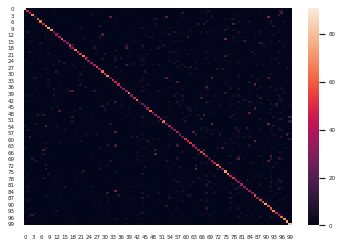

In [ ]:
for task in range(0, 100, params.TASK_SIZE):
  train_indexes = trainDS.__getIndexesGroups__(task)
  test_indexes = test_indexes + testDS.__getIndexesGroups__(task)

  train_dataset = Subset(trainDS, train_indexes, transform = train_transformer)
  test_dataset = Subset(testDS, test_indexes, transform = test_transformer)

  train_loader = DataLoader( train_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE, shuffle=True)
  test_loader = DataLoader( test_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE , shuffle=True )
  
  ICaRL, exemplars = ICaRLModel.incrementalTrain(task, trainDS, ICaRL, exemplars, train_transformer)

  col = []
  for i,x in enumerate( train_splits[ :int(task/10) + 1]) : 
    v = np.array(x)
    col = np.concatenate( (col,v), axis = None)
    col = col.astype(int)
  mean = None
  total = 0.0
  running_corrects = 0.0
  for img, lbl, _ in train_loader:
      img = img.float().to(params.DEVICE)
      preds, mean = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      #print("this is preds")
      #print(preds)
      #labels = utils.mapFunction(lbl, col).to(params.DEVICE)
      #print("this is lbl")
      #print(lbl)
      total += len(lbl)
      running_corrects += torch.sum(preds == lbl.data.to(params.DEVICE)).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'train accuracy = {accuracy}')
  accs.append(accuracy)

  total = 0.0
  running_corrects = 0.0
  tot_preds = []
  tot_lab = []
  for img, lbl, _ in test_loader:
      img = img.float().to(params.DEVICE)
      preds, _ = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      #labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      tot_preds = np.concatenate( ( tot_preds, preds.data.cpu().numpy() ) )
      tot_lab = np.concatenate( (tot_lab, lbl.data.cpu().numpy()  ) )#labels

      total += len(lbl)
      running_corrects += torch.sum(preds == lbl.data.to(params.DEVICE)).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'test accuracy = {accuracy}')
 # cf = confusion_matrix(tot_lab, tot_preds)
 # df_cm = pd.DataFrame(cf, range(task + params.TASK_SIZE), range(task + params.TASK_SIZE))
 # sn.set(font_scale = .5) # for label size
 # sn.heatmap(df_cm, annot=False)
 # plt.show()

In [ ]:
accs = [.897,.80,.76,.69,.64,.58,.54,.52,.48,.46]

In [ ]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def plotTask(pars_tasks):

  x_tasks =  np.linspace(10, 100, 10)

  plt.plot(x_tasks, pars_tasks, label=['Accuracy'])
  plt.xlabel("Epoch")
  plt.ylim(0,1)
  plt.title('Accuracy over tasks')
  plt.legend(['Accuracy'])
  plt.grid(True)
  plt.show()

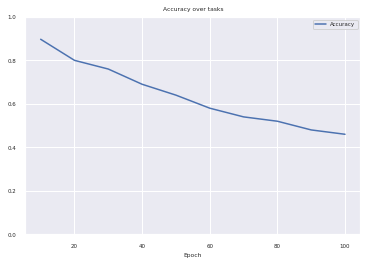

In [ ]:
plotTask(accs)

In [ ]:
np.diagonal(cf)

array([91, 48, 39, 68, 10, 59, 64, 47, 64, 76, 70, 22, 35, 42, 58, 35, 32,
       51, 34, 66, 49, 52, 66, 46, 32, 35, 39, 54, 34, 62, 50, 68, 17, 50,
       47, 46, 29, 30, 35, 64, 25, 46, 62,  9, 25, 26, 35, 63, 28, 37, 30,
       40, 63, 22, 45, 31, 28, 42, 21, 24, 51, 50, 52, 40, 33, 39, 54, 59,
       31, 12, 41, 45, 64, 58, 30, 73, 66, 45, 52, 40, 31, 41, 33, 40, 34,
       33, 56, 30, 57, 56, 75, 57, 59, 69, 47, 34, 61, 70, 75, 80])

In [ ]:
true = np.sum(cf, axis=1)
true

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100])

In [ ]:
pred = np.sum(cf, axis=0)
pred

array([137,  98, 142, 112,  39,  82, 116,  96, 145, 112,  84, 110,  59,
        96,  73,  78,  50,  91,  98,  92,  64, 109,  91,  72,  38,  70,
        76,  81,  89, 102,  81, 116,  72,  59, 177,  59,  62,  63,  93,
        90,  72,  79, 102,  52, 162,  68,  67,  80,  65,  98,  80,  65,
        84,  96, 121,  53,  77, 136,  69, 103,  76,  94, 109,  79, 126,
        61, 126, 106, 182,  68, 122,  94,  90,  80,  80, 159,  98, 132,
       145,  88, 170,  77,  79,  78, 131,  74, 149,  70, 149, 114, 102,
       172, 212, 134, 124, 187, 189, 114, 126, 131])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pred = np.array([137,  98, 142, 112,  39,  82, 116,  96, 145, 112,  84, 110,  59,
        96,  73,  78,  50,  91,  98,  92,  64, 109,  91,  72,  38,  70,
        76,  81,  89, 102,  81, 116,  72,  59, 177,  59,  62,  63,  93,
        90,  72,  79, 102,  52, 162,  68,  67,  80,  65,  98,  80,  65,
        84,  96, 121,  53,  77, 136,  69, 103,  76,  94, 109,  79, 126,
        61, 126, 106, 182,  68, 122,  94,  90,  80,  80, 159,  98, 132,
       145,  88, 170,  77,  79,  78, 131,  74, 149,  70, 149, 114, 102,
       172, 212, 134, 124, 187, 189, 114, 126, 131])

In [ ]:
val = np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
avg = np.mean(pred)
avg

100.0

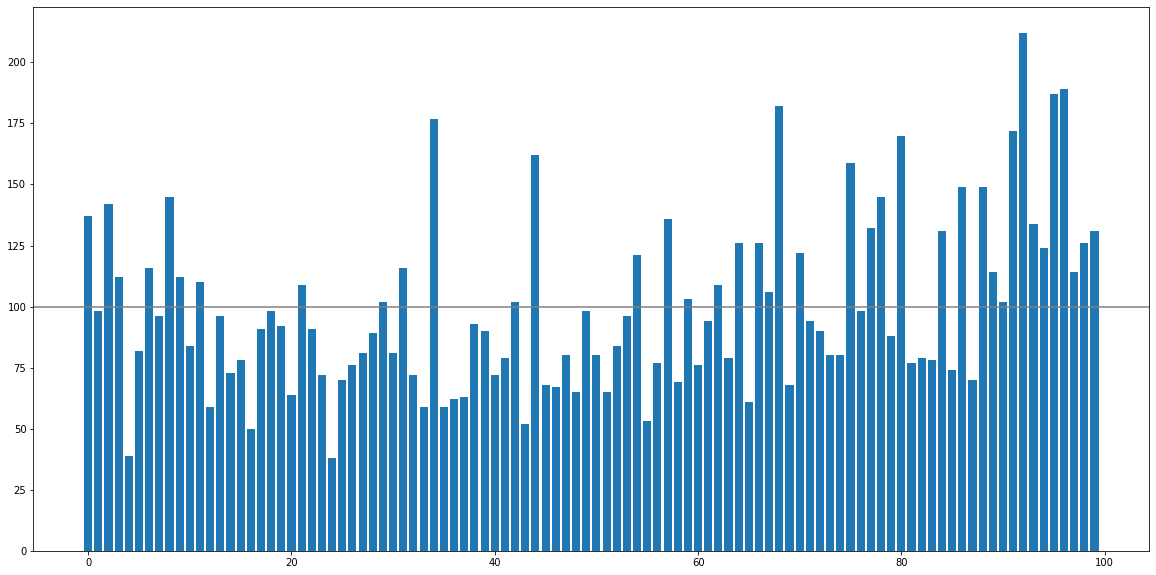

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
x_coordinates = val
ax.bar(x_coordinates, pred, align='center')
ax.axhline(avg, color="gray")
plt.show()

In [ ]:
i = 0
for el, name in zip(pred,trainDS.__getClassesNames__()) :
  print('classe', i, 'name', name, ',preds', el)
  i+=1

classe 0 name apple ,preds 137
classe 1 name aquarium_fish ,preds 98
classe 2 name baby ,preds 142
classe 3 name bear ,preds 112
classe 4 name beaver ,preds 39
classe 5 name bed ,preds 82
classe 6 name bee ,preds 116
classe 7 name beetle ,preds 96
classe 8 name bicycle ,preds 145
classe 9 name bottle ,preds 112
classe 10 name bowl ,preds 84
classe 11 name boy ,preds 110
classe 12 name bridge ,preds 59
classe 13 name bus ,preds 96
classe 14 name butterfly ,preds 73
classe 15 name camel ,preds 78
classe 16 name can ,preds 50
classe 17 name castle ,preds 91
classe 18 name caterpillar ,preds 98
classe 19 name cattle ,preds 92
classe 20 name chair ,preds 64
classe 21 name chimpanzee ,preds 109
classe 22 name clock ,preds 91
classe 23 name cloud ,preds 72
classe 24 name cockroach ,preds 38
classe 25 name couch ,preds 70
classe 26 name crab ,preds 76
classe 27 name crocodile ,preds 81
classe 28 name cup ,preds 89
classe 29 name dinosaur ,preds 102
classe 30 name dolphin ,preds 81
classe 31 na

In [ ]:
train_splits

[[94.0, 63.0, 74.0, 21.0, 35.0, 56.0, 91.0, 96.0, 87.0, 48.0],
 [68.0, 80.0, 22.0, 37.0, 60.0, 97.0, 51.0, 62.0, 92.0, 76.0],
 [75.0, 89.0, 23.0, 99.0, 39.0, 66.0, 54.0, 69.0, 84.0, 61.0],
 [85.0, 24.0, 98.0, 41.0, 73.0, 58.0, 78.0, 77.0, 70.0, 49.0],
 [65.0, 88.0, 36.0, 93.0, 45.0, 10.0, 90.0, 17.0, 32.0, 59.0],
 [83.0, 43.0, 53.0, 11.0, 86.0, 19.0, 38.0, 30.0, 40.0, 50.0],
 [57.0, 81.0, 12.0, 95.0, 25.0, 47.0, 34.0, 52.0, 44.0, 72.0],
 [46.0, 79.0, 20.0, 28.0, 5.0, 71.0, 8.0, 18.0, 33.0, 15.0],
 [55.0, 29.0, 64.0, 31.0, 67.0, 7.0, 13.0, 14.0, 42.0, 6.0],
 [82.0, 2.0, 27.0, 16.0, 26.0, 3.0, 4.0, 1.0, 9.0, 0.0]]

In [ ]:
trainDS.__getClassesNames__()

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig